## Setup YRoots (taken directly from package)
First, in a terminal (Linux/Unix/Mac), navigate to the directory in which you wish to install yroots, then download it from github with the following command:

    git clone https://github.com/tylerjarvis/RootFinding.git   
Then make the yroots module availabe to Python, use the following command:

    pip install -e ./RootFinding
In addition, you will need to have numpy, numba, and scipy installed in order to run YRoots. See the documentation for the corresponding packages to learn how to install any of these.

Before proceeding in this tutorial, you will need to complete the above process and run the following import statements:

In [17]:
import numpy as np
if not hasattr(np, "product"):
    np.product = np.prod


import yroots as yr

## Syntax

The yroots package is used to find the roots of multiple functions at once, given the function definition(s), the starting bound(s), and ending bound(s). It is called with the following function

yr.solve(functions, a, b)

With a being the starting bound(s) and b being the ending bound(s). The variables functions, a, b can called as a list to solve multiple functions at once. Since this works for higher dimension functions as well, it is important that the dimension of the functions matches with the dimension of the boundaries. 

## Examples

Let's first look at a simple univariable function that we found the roots for using Newton's method.

In [18]:
f = lambda x : np.cos(x) -x
a = -1
b = 1

yr.solve(f, a, b)

array([[0.73908513]])

Doing this we find that we get the same result. This package finds the roots of functions by using Chebyshev polynomials to approximate the functions and find the roots of the approximation. This allows us to find the root of functions where the derivative is not known or is difficult/tedious to find. However, it does require a search interval which we might also not have.

And if the interval given to the function does not contain a root, it will simply not return anything. We can show this using simply by adjusting our interval

In [19]:
g = lambda x : np.cos(x) -x
a = 2
b = 3

yr.solve(g, a, b)

[]

## Higher Dimensions

Let's now look at a much more complicated function (taken from the original package)

$$f(x,y) = \sin(xy) + x\log(y+3) - x^2 + \frac{1}{y-4} $$
$$g(x,y) = \cos(3xy) + e^{\frac{3y}{x-2}} - x - 6 $$
on the search domain $[-1,0]\times[-2,1]$.

In [20]:
f = lambda x,y : np.sin(x*y) + x*np.log(y+3) - x**2 + 1/(y-4)
g = lambda x,y : np.cos(3*x*y) + np.exp(3*y/(x-2)) - x - 6
a = [-1,-2] #lower bounds on x and y
b = [0,1] #upper bounds on x and y
roots = yr.solve([f,g], a, b)

print(roots)

[[-0.410034   -1.40471685]
 [-0.73720226 -1.65461673]]


For how complicated these functions are, the method that this package utilizes returns a fast and accurate result which we can see by looking at the time to solve and the residuals.

In [21]:
%time roots = yr.solve([f,g], a, b)

print('residuals for f are {}'.format(np.abs(f(roots[:,0],roots[:,1]))))
print('residuals for g are {}'.format(np.abs(g(roots[:,0],roots[:,1]))))

CPU times: user 36.4 ms, sys: 3.89 ms, total: 40.3 ms
Wall time: 38.7 ms
residuals for f are [6.66133815e-16 4.99600361e-16]
residuals for g are [2.66453526e-15 8.88178420e-16]


The notebook included in the orginial package has a lot more complicated that demonstrates the true extent to how complicated of functions that it can find the roots of. There's too many show in this presentation but to give an example of just how complicated these functions get, here is a plot of one of them.

Nick Trefethen's Hundred-dollar, Hundred-digit Challenge:

$$f(x,y) = e^{\sin(50x)} + \sin(60e^y) + \sin(70 \sin (x))+\sin(\sin(80y)) - \sin(10(x+y)) + 1/4(x^2 + y^2)$$

on the interval $[-1,1]\times[-1,1]$:

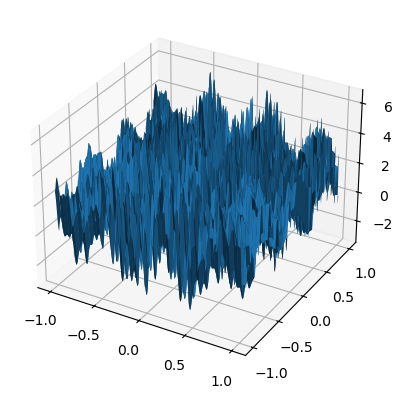

In [22]:
%matplotlib inline
from matplotlib import pyplot as plt

f = lambda x,y : np.exp(np.sin(50*x)) + np.sin(60*np.exp(y)) + np.sin(70*np.sin(x)) + np.sin(np.sin(80*y)) \
                - np.sin(10*(x+y)) + .25 * (x**2 + y**2)
x = np.linspace(-1,1, 1000)
X, Y = np.meshgrid(x, x)

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(X, Y, f(X,Y))

This function has 2720 roots which the program was able to find in under 30 seconds with maximum residuals on the order of $10^{-12}$

## Concluding Remarks

This library evidently showcases a method for rootfinding that is very powerful. By using a Chebyshev approximation for the functions, it is able to very quickly and accurately find the roots for many functions. This method becomes even more efficient for polynomials (which we like since we only have addition, subtraction, and multiplication) as there are built in methods for creating these polynomials directly using a Chebyshev basis meaning the solve function doesn't even have to approximate the function first. 

One the remaining questions that I have about the software is how it creates its approximations? We saw in class doing it with data points, but for this we simply pass a function. Does it evaluate the function at points within the given interval? How many points are used and how was this number decided?

Something that I think could be interesting to experiment with would to be see how the other interpolation methods we saw in class would behave as a way to find roots. We saw how some of the interpolation methods lose accuracy when interpolating with more data points. How would this error in interpolation impact the error in the roots found. Do we find a tendency for the root error to be smaller, larger, the same, or seemingly unrelated to the error in the interpolation? For this I could imagine attempting to create a plot similar to the Convergence plot we saw for the different interpolation methods but having the y-axis be for root error rather than interpolation error.